# Final Project - Applied Deep Learning

**Harjinder Singh Dhesi** 
_0371098_

**Neural Network and Deep Learning**

## Abstract

This notebook contains the data to be used for the project, and data cleaning, analysis, visualization, and preprocessing steps, followed by the neural network and deep leaning models that will be trained on the data to obtain the desired results.

The Data used for this project includes the images of paintings (artworks) of 50 artists and a csv file (which contains the names of all those artists and the number of paintings that belong to each of them). This data will be used to predict artists of the paintings.

Before training the models, data has been reduced to only those artists who have more than 200 artworks. The csv file has many additional features that has no use in the model implementation, therefore, those features have been removed. All the artists have different number of paintings (ranging from 24 to 877 artworks), so weight is calculated for all the artists to show the importance based on the number of artworks. During preprocessing, all of the images have been transformed to target size (224, 224) and have been rescaled to unit value. The target class is treated as categorical and both training and validation image set have been re-shuffled. Some of the images has been horizontally flipped randomly and width and height shift and rotation has been changed randomly to introduce heterogeneity in dataset. A part of training dataset has been used as validation set.
Differnt CNN models used include ResNet50, VGG16, and some CNN models with a customised architecture. These models are tested on the test data data and their performances are evaluated. The models are compared to find the best model that provides the best result more efficiently and with high accuracy.
    
_____
### Use Case - Art Identification to Prevent Forgeries

With time, art is increasingly getting digitized and most of the artworks in this collection are availabe online with easy & free access to them. A way to identify the artists can not only be used to correctly label the artworks to exhibit in museums and art galleries, but also be used to prevent art forgeries. For that, there needs to be a system which can take the image of the artwork as an input and predict who the actual artist is. 

Therefore, the usecase for this project would be art indentification to prevent art forgeries and copyright issues.


Also, being an Artist myself, I have always wanted to work with a related data by incorporating the concepts of machine learning in it. 
We have reached a stage where computers and machines, the creations of humans, have also started creating paitings. Given a painting, a human can identify the artist by looking at it with careful observation and continuous practice. But, Can computers do the same? This is what I will work on in my Project.

 
### Methodology - Convolutional Neural Network (CNN)
    

For the given use case of image classification, I have different CNN Models, i.e., state of art techniques of ResNet50 and VGG16, and customized CNN models. Before training these models, the diversity of the data is increased by data augmentation and the data is randomly transformed using ImageDataGenerator(). The performance of these models is evaluated using accuracy metrics and predicting artists for random images from the test data.
______

### Importing the required libraries

In [1]:
# for reading the dataset
import pandas as pd
import numpy as np

# for visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sb
import os
import random

import json
from tqdm import tqdm, tqdm_notebook
import os
import random

# for creating models
import tensorflow as tf
from tensorflow.keras.applications import *    # VGG16, resnet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

# optimizers - Adam
from tensorflow.keras.optimizers import Adam

# for evaluating the performance of the models
from sklearn.metrics import *

# for data augmentation and randomly transforming data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-12-04 22:17:36.536528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(8)
tf.random.set_seed(8)

### Importing, Cleaning, Preprocessing, Analyzing, and Visualizing the Data

In [3]:
# reading the given csv file as pandas dataframe

df = pd.read_csv("artists.csv")

In [4]:
# displaying the top 5 records from the data

df.head()

id                name        years                         genre  \
0   0   Amedeo Modigliani  1884 - 1920                 Expressionism   
1   1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism   
2   2        Diego Rivera  1886 - 1957       Social Realism,Muralism   
3   3        Claude Monet  1840 - 1926                 Impressionism   
4   4       Rene Magritte  1898 - 1967      Surrealism,Impressionism   

  nationality                                                bio  \
0     Italian  Amedeo Clemente Modigliani (Italian pronunciat...   
1     Russian  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2     Mexican  Diego María de la Concepción Juan Nepomuceno E...   
3      French  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4     Belgian  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88  
2       http://en.wikipedia.org/wiki/Diego_Rivera         70  
3       http://en.wikipedia.org/wiki/Claude_Monet         73  
4      http://en.wikipedia.org/wiki/René_Magritte        194

In [5]:
# printing the shape of this data

print("The shape of the original dataset:")
print("The number of rows:", df.shape[0])
print("The number of columns:", df.shape[1])

The shape of the original dataset:
The number of rows: 50
The number of columns: 8


_____

**50 Artists and their Paintings** 

There is a folder with all the paintings of 50 artists in the dataset.

Apart from that there is a csv file with the following data.

**The data has 8 features of 50 artists** 

Below are the columns present in the dataset - 

**id** : Serial Number starting at 0  

**name** : names of 50 Artists

**years** : the years for which the artist was alive

**genre** : the style of each Artist

**nationality** : country to which the artist belonged/s

**bio**: biography of each artist

**wikipedia** : links to the Wikipedia pages of each artist

**paintings** : Number of paintings of each artists

______

**Source of the data:**

The data has been found from **kaggle** and can be located at the following link:

https://www.kaggle.com/code/supratimhaldar/deepartist-identify-artist-from-art

______


In [6]:
# viewing the count of null values in different columns of the dataframe in ascending order

df.isnull().sum().sort_values(ascending = True)

id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64

**It can be observed that there are no null values in the data.**

In [7]:
# dropping the id column from the dataset

df = df.drop("id", axis = 1)

<AxesSubplot:xlabel='count', ylabel='nationality'>

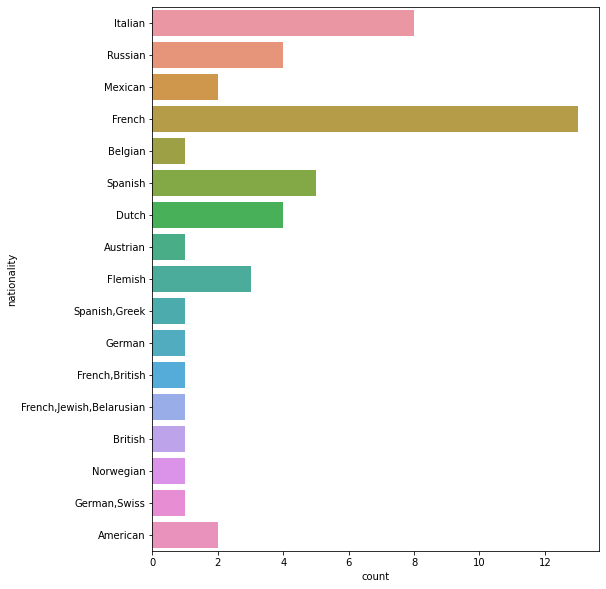

In [8]:
# plotting the distribution of artists based on their nationality

plt.figure(figsize = (8, 10))

nationalityPlot = sb.countplot(y = 'nationality', data = df)

nationalityPlot

It can be seen that **most of the artists belong to France, followed by Italy**.

In [9]:
# only keeping necessary features and creating a new dataframe - artist 

artists = df[["name", "paintings"]]

In [10]:
# displaying the top 5 records from the data

artists.head()

name  paintings
0   Amedeo Modigliani        193
1  Vasiliy Kandinskiy         88
2        Diego Rivera         70
3        Claude Monet         73
4       Rene Magritte        194

In [11]:
# sorting artists in the descending order of the number of their paintings

artists.sort_values(by = ['paintings'], ascending = False)

name  paintings
8            Vincent van Gogh        877
30                Edgar Degas        702
13              Pablo Picasso        439
15      Pierre-Auguste Renoir        336
19             Albrecht Dürer        328
46               Paul Gauguin        311
16             Francisco Goya        291
31                  Rembrandt        262
20              Alfred Sisley        259
32                     Titian        255
22               Marc Chagall        239
4               Rene Magritte        194
0           Amedeo Modigliani        193
42                  Paul Klee        188
28              Henri Matisse        186
45                Andy Warhol        181
12             Mikhail Vrubel        171
24          Sandro Botticelli        164
26          Leonardo da Vinci        143
14          Peter Paul Rubens        141
5               Salvador Dali        139
10           Hieronymus Bosch        137
21             Pieter Bruegel        134
27            Diego Velazquez        128
11           Kazimir Malevich        126
17                Frida Kahlo        120
23          Giotto di Bondone        119
9                Gustav Klimt        117
47                    Raphael        109
44                  Joan Miro        102
7               Andrei Rublev         99
35           Camille Pissarro         91
6               Edouard Manet         90
1          Vasiliy Kandinskiy         88
18                   El Greco         87
43              Piet Mondrian         84
33  Henri de Toulouse-Lautrec         81
29               Jan van Eyck         81
3                Claude Monet         73
2                Diego Rivera         70
40             Henri Rousseau         70
37               Edvard Munch         67
36             William Turner         66
34            Gustave Courbet         59
25                 Caravaggio         55
48               Michelangelo         49
38               Paul Cezanne         47
41             Georges Seurat         43
39           Eugene Delacroix         31
49            Jackson Pollock         24

[]

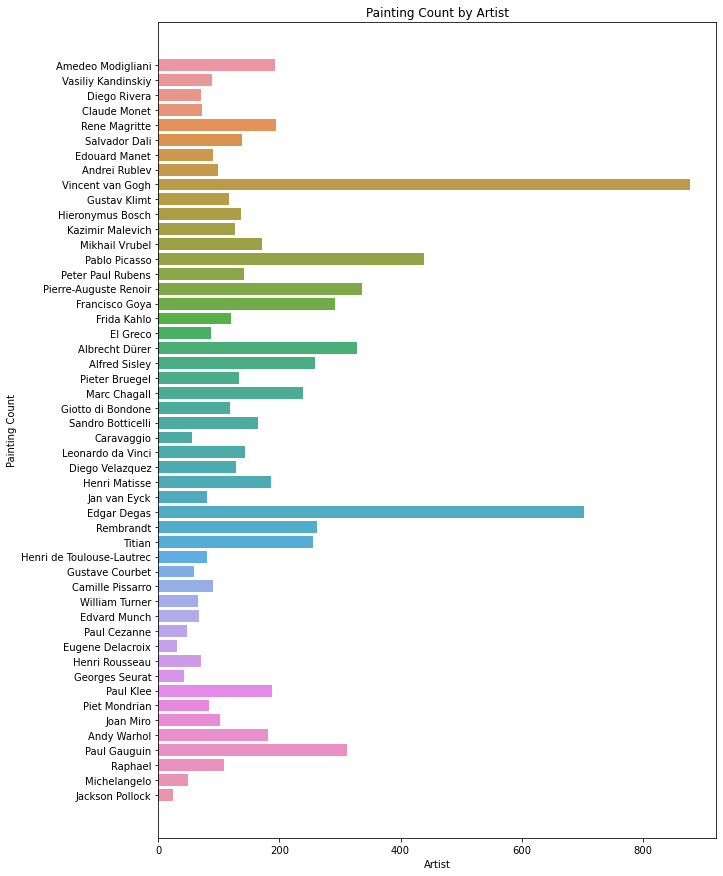

In [12]:
# plotting the distribution of paintings for each artist

plt.figure(figsize = (10, 15))

sb.barplot(x = artists["paintings"], y = artists["name"])

plt.title("Painting Count by Artist")
plt.xlabel("Artist")
plt.ylabel("Painting Count")
plt.plot()

It can be seen that **Vincent van Gogh has the maximum number of paintings (877), whereas Jackson Pollock has the minimum (24).**

**Correlation Coefficient**

There is only one feature with numerical data. So, the correlation of that feature (paintings) with itself has been shown below.

In [13]:
# correlation coefficient between all pairs of features

artists.corr()

paintings
paintings        1.0

## Preprocessing

### a. Reducing the size of Data

I will only keep those artists who have **more than 200 paintings**. 

In [14]:
# only keeping those artsist, who have more than 200 paintings to reduce the data and make it easier for analysis.

top_artists = artists[artists['paintings'] >= 200].reset_index()
top_artists = top_artists[['name', 'paintings']]

top_artists

name  paintings
0        Vincent van Gogh        877
1           Pablo Picasso        439
2   Pierre-Auguste Renoir        336
3          Francisco Goya        291
4          Albrecht Dürer        328
5           Alfred Sisley        259
6            Marc Chagall        239
7             Edgar Degas        702
8               Rembrandt        262
9                  Titian        255
10           Paul Gauguin        311

It can be observed that out of 50 artists, **11 artists have over 200 paintings**.

[]

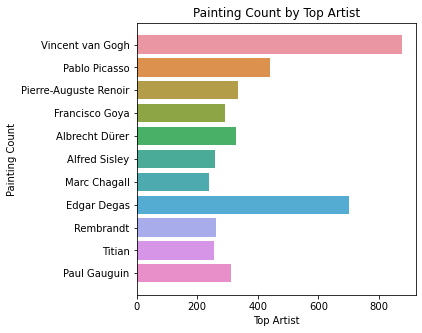

In [15]:
# plotting the distribution of paintings for each top artist

plt.figure(figsize = (5, 5))

sb.barplot(x = top_artists["paintings"], y = top_artists["name"])

plt.title("Painting Count by Top Artist")
plt.xlabel("Top Artist")
plt.ylabel("Painting Count")
plt.plot()

It can be seen that, out of those 11 artists, **Vincent Van Gogh has the maximum number of paintings and Marc Chagall has the minimum.**

In [16]:
# printing the shape of the data from start to now

print("The shape of the original data:", df.shape)
print("The shape of the data with the required features only:", artists.shape)
print("The shape of the data with top artists:", top_artists.shape)

The shape of the original data: (50, 7)
The shape of the data with the required features only: (50, 2)
The shape of the data with top artists: (11, 2)


In [17]:
# seeing if all the folders of different artists with their paintings are there at the location

# path of the location where the image data is located
images_dir = '/Users/parjinderdhesi/Desktop/fall_term_DSML_2022/COMP-3704 Neural Networks and Deep Learning/Assignments/Project 1/Data_sample1/images'  
artists_dirs = os.listdir(images_dir)

# replacing space ' ' in names of all top artists in the dataset with an underscore '_' to match the file names
top_artists_name = top_artists['name'].str.replace(' ', '_').values

count = 0

# seeing if all directories exist
for name in top_artists_name:
    if os.path.exists(os.path.join(images_dir, name)):
        for path in os.listdir(os.path.join(images_dir, name)):
            if os.path.isfile(os.path.join(os.path.join(images_dir, name), path)):
                count += 1
        print("Found -->", name, "with", count, "images of paintings in original data.")
        count = 0
    
    else:
        print("Did not find -->", name)

Found --> Vincent_van_Gogh with 878 images of paintings in original data.
Found --> Pablo_Picasso with 439 images of paintings in original data.
Found --> Pierre-Auguste_Renoir with 337 images of paintings in original data.
Found --> Francisco_Goya with 292 images of paintings in original data.
Found --> Albrecht_Dürer with 329 images of paintings in original data.
Found --> Alfred_Sisley with 260 images of paintings in original data.
Found --> Marc_Chagall with 240 images of paintings in original data.
Found --> Edgar_Degas with 703 images of paintings in original data.
Found --> Rembrandt with 263 images of paintings in original data.
Found --> Titian with 256 images of paintings in original data.
Found --> Paul_Gauguin with 312 images of paintings in original data.


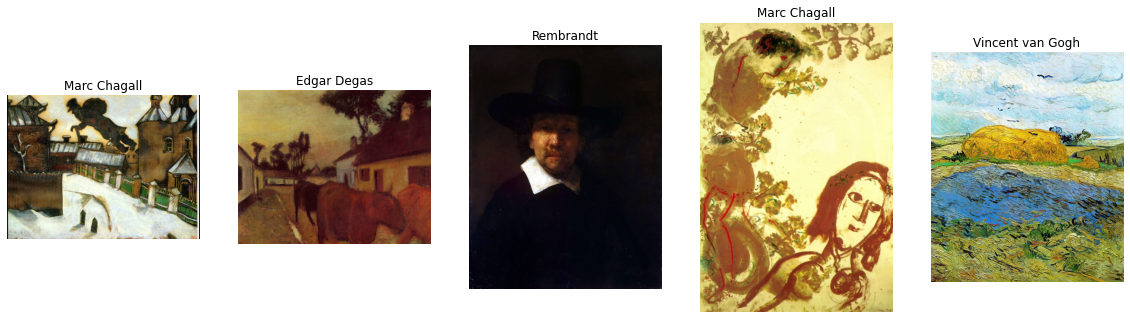

In [18]:
# printing 5 random paintings of different artists

n = 5     
fig, axes = plt.subplots(1, n, figsize = (20, 10))

for i in range(n):
    random_artist = random.choice(top_artists_name)     # random artist from top artists
    
    # navigating to the directory of that of artist
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist))) 
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    
    # reading the file at the location defined above
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title(random_artist.replace('_', ' '))
    axes[i].axis('off')        # turning off the axis while displaying the image

plt.show()

Above can be seen **5 random paintings of different artists from our 11 top artsists.**

### b. Class Weight for each artist

I will creating another feature **class_weight** in the data **with the weight assigned to each artist based on the number of their paintings** just to differentiate the importance.

In [19]:
# creating another column in the top_artsist data

top_artists['class_weight'] = top_artists.paintings.sum() / (top_artists.shape[0] * top_artists.paintings)

In [20]:
# displaying the top 5 records from the data

top_artists.head()

name  paintings  class_weight
0       Vincent van Gogh        877      0.445631
1          Pablo Picasso        439      0.890246
2  Pierre-Auguste Renoir        336      1.163149
3         Francisco Goya        291      1.343018
4         Albrecht Dürer        328      1.191519

**Higher weights are assigned to underrepresented classes**

### c. Data Augmentation

Here, the **diversity of the data will be increased by randomly transforming the image data without actually collecting new data**. The techniques like padding , cropping , shifting , flipping etc. will be used.

In [21]:
batch_size = 16
train_input_shape = (224, 224, 3)
n_classes = top_artists.shape[0]     # n_classes = 11

In [22]:
# generating more data

train_img_gen = ImageDataGenerator(validation_split = 0.2,  # data is split in 80%-training & 20%-validation data
                                   rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.5,
                                   zoom_range = 0.4,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                  )

test_img_gen = ImageDataGenerator(rescale = 1./255.)

### d. Splitting data into Train, Valid, and Test sets

I will split the data into **train, valid, and test** in the **ratio of 80:20:10**.
I couldn't figure out a way to split data into these three sets from 11 different folders using code. So, I manually created differnt folders for train and test data and split the train data folder into train and valid using ImageDataGenerator.

In [23]:
# path of the location where the train image data is located

train_images_dir = '/Users/parjinderdhesi/Desktop/fall_term_DSML_2022/COMP-3704 Neural Networks and Deep Learning/Assignments/Project 1/Data_sample1/train'  

# path of the location where the test image data is located

test_images_dir = '/Users/parjinderdhesi/Desktop/fall_term_DSML_2022/COMP-3704 Neural Networks and Deep Learning/Assignments/Project 1/Data_sample1/test'  

In [24]:
# training data 

train_generator = train_img_gen.flow_from_directory(directory = train_images_dir,
                                                    class_mode = 'categorical',
                                                    target_size = train_input_shape[0:2],  # 224 x 244
                                                    batch_size = batch_size,               # 16
                                                    subset = "training",
                                                    shuffle = True,                        # randomly shuffling the data
                                                    classes = top_artists_name.tolist()    # list of classes
                                                   )

# validation data

valid_generator = train_img_gen.flow_from_directory(directory = train_images_dir,
                                                    class_mode = 'categorical',
                                                    target_size = train_input_shape[0:2],
                                                    batch_size = batch_size,
                                                    subset = "validation",
                                                    shuffle = True,
                                                    classes = top_artists_name.tolist()
                                                   )

# testing data

test_generator = test_img_gen.flow_from_directory(directory = test_images_dir,
                                                    class_mode = 'categorical',
                                                    target_size = train_input_shape[0:2],
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    classes = top_artists_name.tolist()
                                                   )

Found 3097 images belonging to 11 classes.
Found 771 images belonging to 11 classes.
Found 431 images belonging to 11 classes.


The **training data** has **3097 images** from 11 artists.

The **validation data** has **771 images** from 11 artists.

The **testing data** has **431 images** from 11 artists.

In [25]:
# defining the step size per epoch for both training and validation data

step_size_train = train_generator.n//train_generator.batch_size
step_size_valid = valid_generator.n//valid_generator.batch_size

print("Total number of batches =", step_size_train, "and", step_size_valid)

Total number of batches = 193 and 48


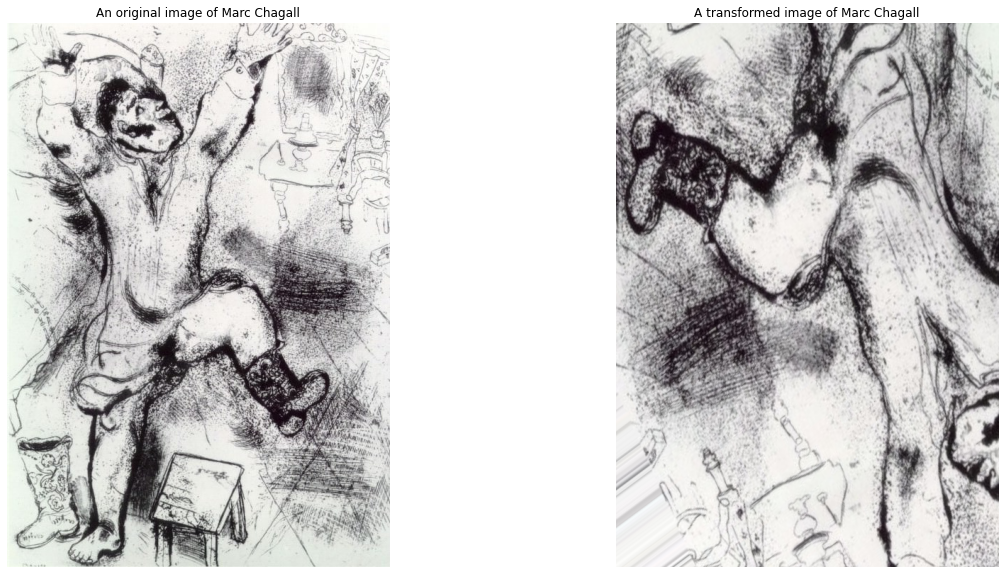

In [26]:
# printing random paintings and it's random augmented version

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

random_artist = random.choice(top_artists_name)
random_image = random.choice(os.listdir(os.path.join(train_images_dir, random_artist)))
random_image_file = os.path.join(train_images_dir, random_artist, random_image)

# original image before augmentation
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original image of " + random_artist.replace('_', ' '))
axes[0].axis('off')

# transformed image after augmentation
aug_image = train_img_gen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed image of " + random_artist.replace('_', ' '))
axes[1].axis('off')

plt.show()

We can observe a **vertical flip and some other transformations in the image of the painting by Marc Chagall** after data augmentation.
_____

## Models

As the use case of my project is artist identification from the images of paintings, I will perform Image Classification using different CNN models.

For that, I will be implementing **different CNN models including, customized architectures, state of art VGG16 and resnet50 models** on the data and will be comparing their performance in the end to find the best model. 
_____

### a. Customized Convolutional Neural Network 

_____

<div align="center"> Model 1 </div>

**Architecture of model is as follows -**

1. **Conv2D** layer - with 16 kernels of shape (3,3) and 'relu' activation function. 
    The input shape of the training image data has been kept (224, 224, 3).
2. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
3. **Conv2D** with 32 kernels of shape (3,3) and 'relu' activation function. 
4. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
5. **Conv2D** with 64 kernels of shape (3,3) and 'relu' activation function. 
6. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
7. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
8. **Dense** layer - with 128 neurons and 'relu' activation.
9. **Dense** layer with 32 neurons and 'relu' activation.
10. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [27]:
# creating the first CNN model

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, 3, activation = 'relu', input_shape = train_input_shape), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Conv2D(64, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Flatten(), \
                             tf.keras.layers.Dense(128, activation = 'relu'), \
                             tf.keras.layers.Dense(32, activation = 'relu'), \
                             tf.keras.layers.Dense(11, activation = 'softmax')
                            ])

2022-12-04 22:19:31.445206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# getting the summary of this model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

There are **5,565,995 trainable parameters** and **no non-trainable parameters**.

In [29]:
# using Adam optimizer with learning rate = 0.001

optimizer_adam = tf.keras.optimizers.Adam(0.001)

In [30]:
# compiling this model using 'accuracy' as the evaluation metrics

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [31]:
# fitting the model on our data with 10 epochs

history = model.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 10, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/10
193/193 [==============================] - 123s 633ms/step - loss: 2.0719 - accuracy: 0.2769 - val_loss: 1.8907 - val_accuracy: 0.3281
Epoch 2/10
193/193 [==============================] - 120s 620ms/step - loss: 1.7484 - accuracy: 0.3924 - val_loss: 1.9176 - val_accuracy: 0.3503
Epoch 3/10
193/193 [==============================] - 119s 614ms/step - loss: 1.6410 - accuracy: 0.4262 - val_loss: 1.6245 - val_accuracy: 0.4375
Epoch 4/10
193/193 [==============================] - 118s 611ms/step - loss: 1.5905 - accuracy: 0.4537 - val_loss: 1.6597 - val_accuracy: 0.4349
Epoch 5/10
193/193 [==============================] - 118s 613ms/step - loss: 1.4954 - accuracy: 0.4804 - val_loss: 1.6115 - val_accuracy: 0.4401
Epoch 6/10
193/193 [==============================] - 119s 617ms/step - loss: 1.4444 - accuracy: 0.4963 - val_loss: 1.4683 - val_accuracy: 0.4922
Epoch 7/10
193/193 [==============================] - 120s 620ms/step - loss: 1.4073 - accuracy: 0.5054 - val_loss: 1.4898 -

In [32]:
# evaluating the model on data and getting, Training, Validation, and Testing Accuracy

results_train = model.evaluate(train_generator)

results_valid = model.evaluate(valid_generator)

results_test = model.evaluate(test_generator)

27/27 [==============================] - 9s 333ms/step - loss: 1.5618 - accuracy: 0.4640


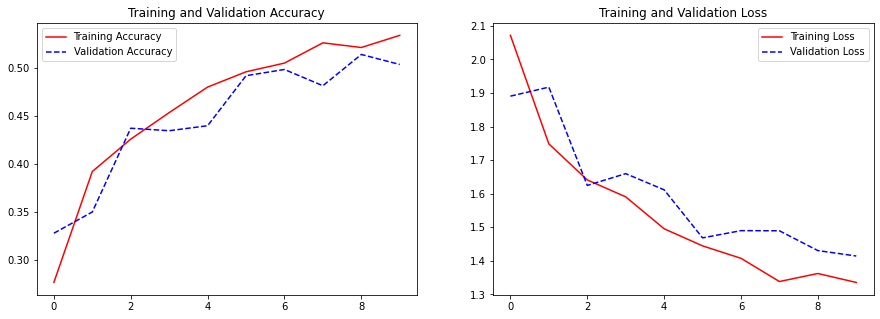

In [36]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history)

It can be seen from the above plot that **the training and validation accuracy and loss are changing proportionally to each other.**

The validation accuracy and loss have shown more fluctuations over the 10 epochs.

The validation accuracy in the beginning was greater than the training accuracy, whereas, by the end it is the opposite.

1/1 [==============================] - 0s 26ms/step


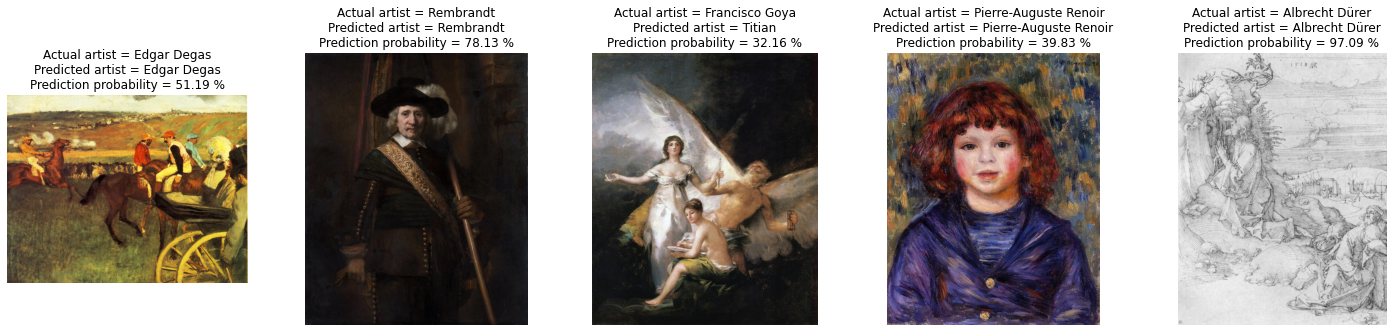

In [35]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of 5 random paintings displayed above, **the model was able to predict correct artist for 4 of them** with prediction accuracies as shown along with them.

Out of those 4 correct predictions, the model predicted one artists with probability over 0.97  and one with as low as 0.39.

**Observation** - 
______

First CNN model - **model**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.2401 | 0.5557 |
| Validation | 1.4336 | 0.5162 |
| Testing | 1.5618 | 0.4640 |

The training accuracy is higher than both validation and testing accuracies, but, the other two accuracies are also decently high. The model might have **overfit a little**, but the results can be improved, by making some changes to the architecture.

______

**The testing accuracy of this first model came out as approximately 46%**, which is not the best, but given the type of data, it still performed well in terms of making predictions. 
______

_____

<div align="center"> Model 2 </div>

**Architecture of model1 is as follows -**

1. **Conv2D** layer - with 16 kernels of shape (3,3) and 'relu' activation function. 
    The input shape of the training image data has been kept (224, 224, 3).
2. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
3. **Conv2D** with 32 kernels of shape (3,3) and 'relu' activation function. 
4. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
5. **Conv2D** with 128 kernels of shape (3,3) and 'relu' activation function. 
6. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
7. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
8. **Dense** layer - with 64 neurons and 'relu' activation.
9. **Dense** layer with 32 neurons and 'relu' activation.
10. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [47]:
# creating the second CNN model

model1 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, 3, activation = 'relu', input_shape = train_input_shape), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Conv2D(128, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Flatten(), \
                             tf.keras.layers.Dense(64, activation = 'relu'), \
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32, activation = 'relu'), \
                             tf.keras.layers.Dense(11, activation = 'softmax')
                          ])

In [48]:
# getting the summary of this model

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       36992     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

There are **5,582,507 trainable parameters** and **no non-trainable parameters**.

In [49]:
# using Adam optimizer with learning rate = 0.001

optimizer_adam = tf.keras.optimizers.Adam(0.001)

In [50]:
# compiling this model using 'accuracy' as the evaluation metrics

model1.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [51]:
# fitting the model on our data with 20 epochs

history1 = model1.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 20, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/20
193/193 [==============================] - 123s 633ms/step - loss: 2.0187 - accuracy: 0.2983 - val_loss: 5.1045 - val_accuracy: 0.2031
Epoch 2/20
193/193 [==============================] - 121s 627ms/step - loss: 1.7263 - accuracy: 0.3937 - val_loss: 2.5155 - val_accuracy: 0.2005
Epoch 3/20
193/193 [==============================] - 123s 637ms/step - loss: 1.6349 - accuracy: 0.4232 - val_loss: 1.7998 - val_accuracy: 0.4023
Epoch 4/20
193/193 [==============================] - 123s 639ms/step - loss: 1.5793 - accuracy: 0.4469 - val_loss: 1.7618 - val_accuracy: 0.3893
Epoch 5/20
193/193 [==============================] - 123s 636ms/step - loss: 1.5241 - accuracy: 0.4645 - val_loss: 1.6543 - val_accuracy: 0.4167
Epoch 6/20
193/193 [==============================] - 121s 627ms/step - loss: 1.4647 - accuracy: 0.4817 - val_loss: 1.6005 - val_accuracy: 0.4349
Epoch 7/20
193/193 [==============================] - 121s 624ms/step - loss: 1.4500 - accuracy: 0.4865 - val_loss: 1.4717 -

In [52]:
# evaluating the model on data

results_train1 = model1.evaluate(train_generator)

results_valid1 = model1.evaluate(valid_generator)

results_test1 = model1.evaluate(test_generator)

27/27 [==============================] - 9s 328ms/step - loss: 1.3650 - accuracy: 0.5313


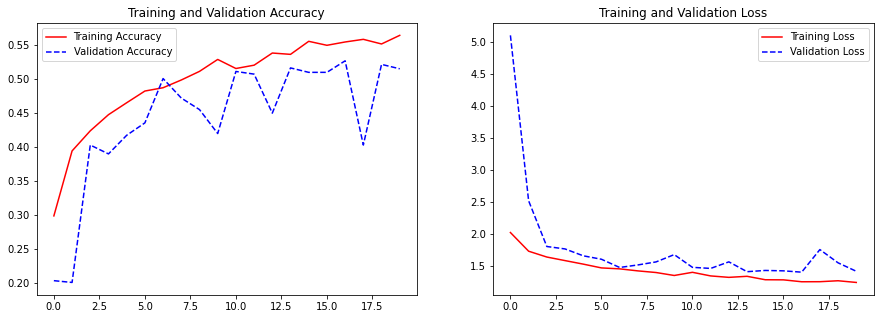

In [53]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history1)

It can be seen from the above plot that **the training and validation accuracy and loss are changing proportionally to each other**, with validation accuracy and loss showing a sharp change in the starting epochs.

The validation accuracy and loss have shown more fluctuations over the 20 epochs.


The validation accuracy is lower than the training accuracy during the whole training proecess, but the values don't show much difference from the training metrics.

1/1 [==============================] - 0s 39ms/step


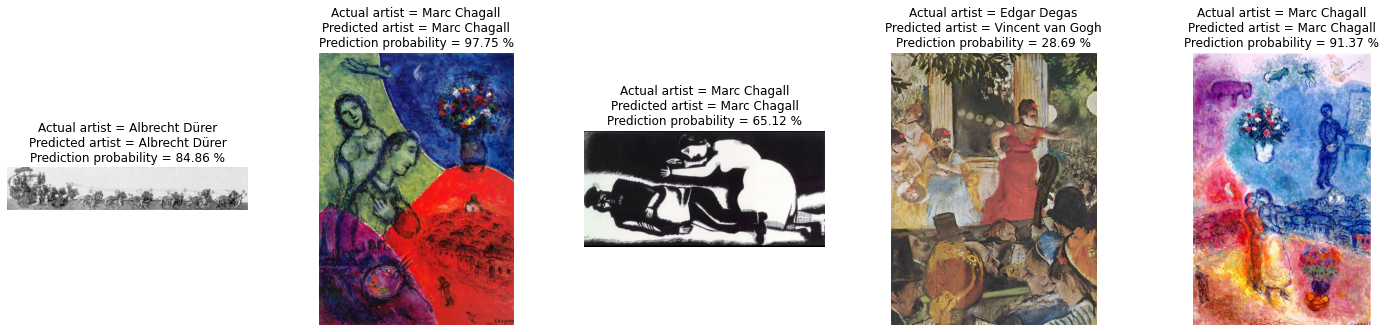

In [54]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model1.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of the above 5 random paintings, **the model was able to predict correct artist for 4 of them**.

Out of those 4 correct predictions, the model predicted one artists with probability over 0.97  and one with lowest of 0.65, which seems pretty good.

**Observation** - 
______

Second CNN model - **model1**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.2343 | 0.5593|
| Validation | 1.4158 | 0.5084 |
| Testing | 1.3650| 0.5313 |

The training accuracy is higher than both validation and testing accuracies, but, the other two accuracies are also decently high. With very close values of the accuracies and loss, the results show that the model is **neither overfitting not overfitting**. 


_____
**The testing accuracy of this second model came out as approximately 53%** and **it performed better than the last model.**
_____

<div align="center"> Model 3 </div>

**Architecture of model3 is as follows -**

1. **Conv2D** layer - with 32 kernels of shape (3,3) and 'relu' activation function. 
    The input shape of the training image data has been kept (224, 224, 3).
2. **Conv2D** layer - with 32 kernels of shape (3,3) and 'relu' activation function. 
3. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
4. **Dropout()** layer with 0.2 as the dropout rate - to prevent overfitting in our model by randomly dropping units during training. 
5. **Conv2D** layer - with 64 kernels of shape (3,3) and 'relu' activation function. 
6. **Conv2D** layer - with 64 kernels of shape (3,3) and 'relu' activation function. 
7. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
8. **Dropout()** layer with 0.2 as the dropout rate - to prevent overfitting in our model by randomly dropping units during training. 
9. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
10. **Dense** layer - with 256 neurons and 'relu' activation.
11. **Dropout()** layer with 0.5 as the dropout rate - to prevent overfitting in our model by randomly dropping neurons during training. 
12. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [78]:
# creating the third CNN model

model3 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = train_input_shape), \
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Dropout(0.2), \
                             tf.keras.layers.Conv2D(64, 3, activation = 'relu', input_shape = train_input_shape), \
                             tf.keras.layers.Conv2D(64, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Dropout(0.2), \
                             tf.keras.layers.Flatten(), \
                             tf.keras.layers.Dense(256, activation = 'relu'), \
                             tf.keras.layers.Dropout(0.5), \
                             tf.keras.layers.Dense(11, activation = 'softmax')
                            ])

In [79]:
# getting the summary of this model

model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 64)      36928     
                                                      

There are **46,091,307 trainable parameters** and **no non-trainable parameter**.

In [80]:
# using Adam optimizer with learning rate = 0.0001

optimizer_adam = tf.keras.optimizers.Adam(0.0001)

In [81]:
# compiling this model using 'accuracy' as the evaluation metrics

model3.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [82]:
# fitting the model on our data with 30 epochs

history3 = model3.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 30, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/30
193/193 [==============================] - 380s 2s/step - loss: 2.1618 - accuracy: 0.2502 - val_loss: 1.9839 - val_accuracy: 0.3633
Epoch 2/30
193/193 [==============================] - 355s 2s/step - loss: 1.9197 - accuracy: 0.3460 - val_loss: 1.8463 - val_accuracy: 0.3971
Epoch 3/30
193/193 [==============================] - 300s 2s/step - loss: 1.8012 - accuracy: 0.3625 - val_loss: 1.7803 - val_accuracy: 0.3750
Epoch 4/30
193/193 [==============================] - 258s 1s/step - loss: 1.7401 - accuracy: 0.3879 - val_loss: 1.7095 - val_accuracy: 0.4219
Epoch 5/30
193/193 [==============================] - 2211s 12s/step - loss: 1.6889 - accuracy: 0.4187 - val_loss: 1.6068 - val_accuracy: 0.4596
Epoch 6/30
193/193 [==============================] - 6337s 33s/step - loss: 1.6349 - accuracy: 0.4219 - val_loss: 1.5823 - val_accuracy: 0.4583
Epoch 7/30
193/193 [==============================] - 9275s 48s/step - loss: 1.5861 - accuracy: 0.4411 - val_loss: 1.5609 - val_accuracy: 

In [84]:
# evaluating the model on data

results_train3 = model3.evaluate(train_generator)

results_valid3 = model3.evaluate(valid_generator)

results_test3 = model3.evaluate(test_generator)

27/27 [==============================] - 12s 441ms/step - loss: 1.3874 - accuracy: 0.5360


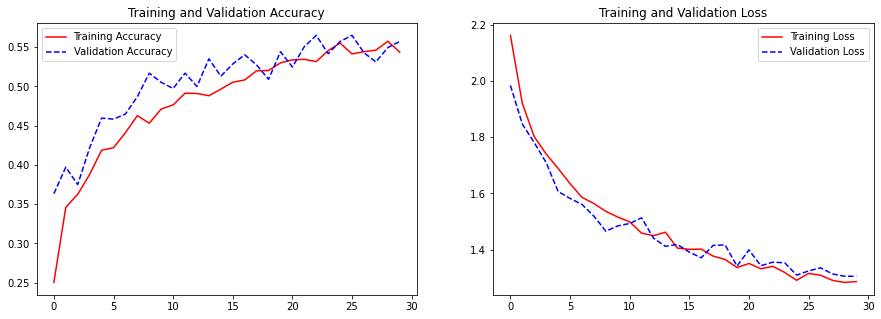

In [85]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history3)

It can be seen from the above plot that **the training and validation accuracy and loss are changing proportionally to each other**.

The validation accuracy and loss have shown more fluctuations over the 30 epochs.

The validation accuracy is higher than the training accuracy throughout the epochs, which might be a **sign of underfitting**. But given all the accuracies are comparitely high, the model seems to have performed well.

1/1 [==============================] - 0s 50ms/step


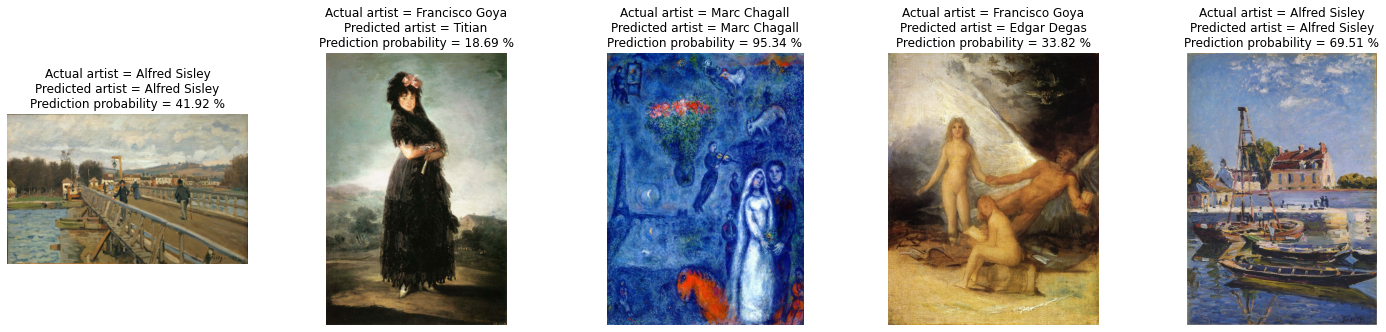

In [88]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model3.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of the above 5 random paintings, **the model was able to predict correct artist for 3 of them**.

Out of those 3 correct predictions, the model predicted one artists with probability over 0.95  and one with lowest of 0.42.

**Observation** - 
______

Third CNN model - **model3**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.288 | 0.6187|
| Validation | 1.3031 | 0.5564 |
| Testing | 1.3874| 0.5360 |

The training accuracy is higher than both validation and testing accuracies, but, the other two accuracies are also decently high. By looking at these values, the model seems to have **overfit a little**. But this result is after training the model for 30 epochs. Throughout these epochs, the validation accuracy was higher than the training accuracy at some points, which is a sign of underfitting.


_____
**The testing accuracy of this second model came out as approximately 54%** and **it performed good in terms of predicting the artists labels.** 
_____

<div align="center"> Model 4 </div>

**Architecture of model3 is as follows -**


1. **Conv2D** layer - with 32 kernels of shape (3,3) and 'relu' activation function. 
    The input shape of the training image data has been kept (224, 224, 3).
2. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
3. **Conv2D** with 32 kernels of shape (3,3) and 'relu' activation function. 
4. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
5. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
6. **Dense** layer - with 64 neurons and 'relu' activation.
7. **BatchNormalization()** layer - a regularization technique to speed up training, use higher learning rates, and making learning easier.
8. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [110]:
# creating the fourth CNN model

model4 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = train_input_shape), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Conv2D(32, 3, activation = 'relu'), \
                             tf.keras.layers.MaxPooling2D(), \
                             tf.keras.layers.Flatten(), \
                             tf.keras.layers.Dense(64, activation = 'relu'), \
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(11, activation = 'softmax')
                            ])

In [111]:
# getting the summary of this model

model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 93312)             0         
                                                                 
 dense_30 (Dense)            (None, 64)              

Out of total 5,983,147 parameters, there are **5,983,019 trainable parameters** and **128 non-trainable parameters**.

In [112]:
# using Adam optimizer with leaning rate = 0.001

optimizer_adam = tf.keras.optimizers.Adam(0.001)

In [113]:
# compiling this model using 'accuracy' as the evaluation metric

model4.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [114]:
# fitting the model on our data with 10 epochs

history4 = model4.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 10, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/10
193/193 [==============================] - 139s 714ms/step - loss: 1.8874 - accuracy: 0.3713 - val_loss: 2.4587 - val_accuracy: 0.2031
Epoch 2/10
193/193 [==============================] - 140s 728ms/step - loss: 1.6589 - accuracy: 0.4249 - val_loss: 1.7893 - val_accuracy: 0.3828
Epoch 3/10
193/193 [==============================] - 141s 731ms/step - loss: 1.5582 - accuracy: 0.4544 - val_loss: 1.6792 - val_accuracy: 0.4349
Epoch 4/10
193/193 [==============================] - 192s 997ms/step - loss: 1.4982 - accuracy: 0.4719 - val_loss: 2.1286 - val_accuracy: 0.3620
Epoch 5/10
193/193 [==============================] - 344s 2s/step - loss: 1.4735 - accuracy: 0.4755 - val_loss: 1.9363 - val_accuracy: 0.3451
Epoch 6/10
193/193 [==============================] - 150s 776ms/step - loss: 1.4877 - accuracy: 0.4869 - val_loss: 1.6177 - val_accuracy: 0.4531
Epoch 7/10
193/193 [==============================] - 152s 787ms/step - loss: 1.4221 - accuracy: 0.5021 - val_loss: 1.5121 - va

In [115]:
# evaluating the model on data

results_train4 = model4.evaluate(train_generator)

results_valid4 = model4.evaluate(valid_generator)

results_test4 = model4.evaluate(test_generator)

27/27 [==============================] - 9s 325ms/step - loss: 1.5903 - accuracy: 0.4872


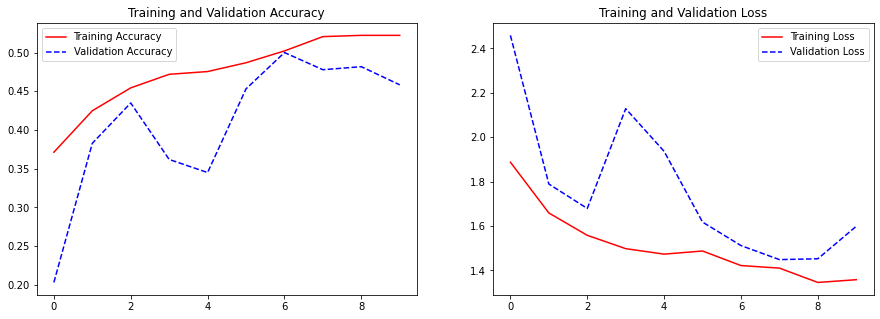

In [116]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history4)

It can be seen from the above plot that **the training and validation accuracy and loss are changing proportionally to each other**.

The validation accuracy and loss have shown more and high fluctuations over the 10 epochs.
The model doesn't seem to have performed very well with those big fluctuations.

1/1 [==============================] - 0s 28ms/step


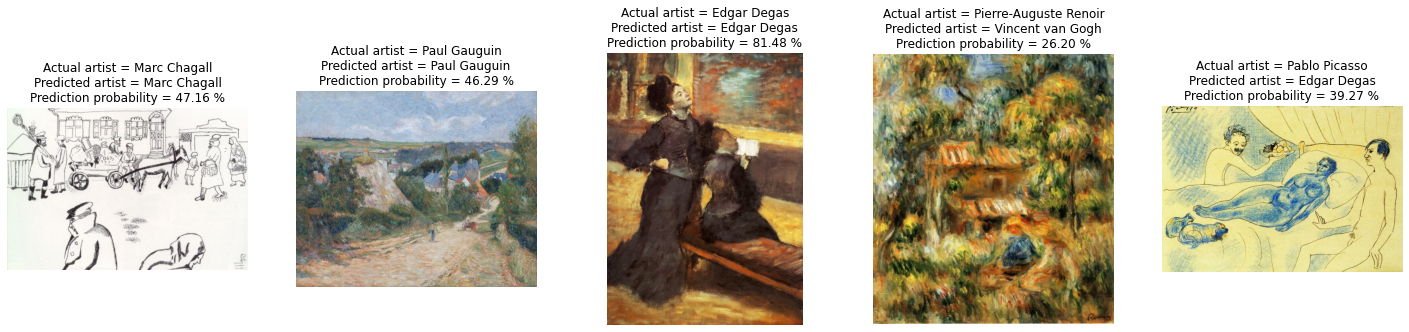

In [118]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model4.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of the above 5 random paintings, **the model was able to predict correct artist for 3 of them**.

Out of those 3 correct predictions, the model predicted one artists with probability over 0.81  and one with lowest of 0.46, which isn't as good as the last models.

**Observation** - 
______

Second CNN model - **model1**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.5481 | 0.4559 |
| Validation | 1.5881 | 0.4527 |
| Testing | 1.5903 | 0.4872 |

The training accuracy is higher than validation accuracy, but is lower than the testing accuracy. The testing accuracy is the highest among all, which means, there needs to be further finetuning of the hyperparameters to increase the training and validation accuracies (which are almost the same in this case.)

_____
**The testing accuracy of this second model came out as approximately 49%**, which is still not the best and **is lower than all the last models.**
_____

#### Conclusion & Comparison -

- **Accuracies of different models** -

| Data| model | model1 | model3 | model4 |
| ---- |--------------- | ---- | ---- | ----- |
| Training | 0.5557 | 0.5593 | 0.6187 | 0.4559 |
| Validation | 0.5162 | 0.5084 | 0.5564 | 0.4527 |
| Testing | 0.4640 | 0.5313 | 0.5360 | 0.4872 |


Out of the above 4 CNN models, the **best two models are model1 and model2** because of their comparitively high training, validation, and testing accuracies. 

**The accuracy can be further increased by playing around with different parameters such as -** 

* Changing the number of neurons
* Changing number of hidden layers
* Increasing epochs
* Playing around with convolutional layer parameters

I trained many models before these and most of them were overfitting with very high training accuracy and as low validation accuracies. There has been some improvemnet in the results after that though, but the results are still not the best yet.

____

### b. Pre-trained-models (Transfer Learning)
____



<div align="center"> VGG16 </div>

VGG16 is a **convolutional neural network with 16 layers.** We can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

**My data has just 11 classes with around 4000 images.** Overfitting can be expected in this model. I will use VGG16 as the base model, will not train its already trained layers and will add some dense layers in the end.

In [56]:
# creating a VGG16 base model for the fifth CNN model

base_model = VGG16(input_shape = train_input_shape, weights = 'imagenet', include_top = False)

# include_top = False don't include the last dense (fully connected) layers of the VGG16 architecture.

In [59]:
# we don't need to train the already trained 13 layers of this VGG16 model

for layer in base_model.layers:
    layer.trainable = False

In [60]:
# getting the summary of this base model

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<div align="center"> VGG16 (Model 5) </div>

**Architecture of model2 is as follows -**


1. **VGG16 base model** - First 13 layers.
2. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
3. **Dense** layer - with 128 neurons and 'relu' activation.
4. **BatchNormalization()** layer - a regularization technique to speed up training, use higher learning rates, and making learning easier.
5. **Dense** layer - with 16 neurons and 'relu' activation.
6. **BatchNormalization()** layer - a regularization technique to speed up training, use higher learning rates, and making learning easier.
7. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [63]:
# creating the fifth CNN model

model2 = tf.keras.Sequential([base_model, \
                            tf.keras.layers.Flatten(), \
                            tf.keras.layers.Dense(128, activation = 'relu'), \
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dense(16, activation = 'relu'), \
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dense(11, activation = 'softmax')])

In [64]:
# getting the summary of this model

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               3211392   
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 16)                2064      
                                                                 
 batch_normalization_7 (Batc  (None, 16)               64        
 hNormalization)                                      

Out of total 17,928,907 parameters, there are **3,213,931 trainable parameters** and **14,714,976 non-trainable parameters**.

In [65]:
# using Adam optimizer with learning_rate = 0.0001

optimizer_adam = tf.keras.optimizers.Adam(0.0001)

In [66]:
# compiling this model using 'accuracy' as the evaluation metrics

model2.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [67]:
# fitting the model on our data with 10 epochs

history2 = model2.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 10, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/10
193/193 [==============================] - 551s 3s/step - loss: 2.0407 - accuracy: 0.3337 - val_loss: 1.8918 - val_accuracy: 0.3724
Epoch 2/10
193/193 [==============================] - 533s 3s/step - loss: 1.7283 - accuracy: 0.4463 - val_loss: 1.7268 - val_accuracy: 0.4609
Epoch 3/10
193/193 [==============================] - 531s 3s/step - loss: 1.6141 - accuracy: 0.4943 - val_loss: 1.9710 - val_accuracy: 0.4089
Epoch 4/10
193/193 [==============================] - 530s 3s/step - loss: 1.5284 - accuracy: 0.5248 - val_loss: 1.5359 - val_accuracy: 0.5286
Epoch 5/10
193/193 [==============================] - 979s 5s/step - loss: 1.4848 - accuracy: 0.5463 - val_loss: 1.4758 - val_accuracy: 0.5456
Epoch 6/10
193/193 [==============================] - 528s 3s/step - loss: 1.4283 - accuracy: 0.5618 - val_loss: 1.4399 - val_accuracy: 0.5430
Epoch 7/10
193/193 [==============================] - 528s 3s/step - loss: 1.3462 - accuracy: 0.5858 - val_loss: 1.7547 - val_accuracy: 0.4245

In [68]:
# evaluating the model on data

results_train2 = model2.evaluate(train_generator)

results_valid2 = model2.evaluate(valid_generator)

results_test2 = model2.evaluate(test_generator)

27/27 [==============================] - 75s 3s/step - loss: 1.4607 - accuracy: 0.5104


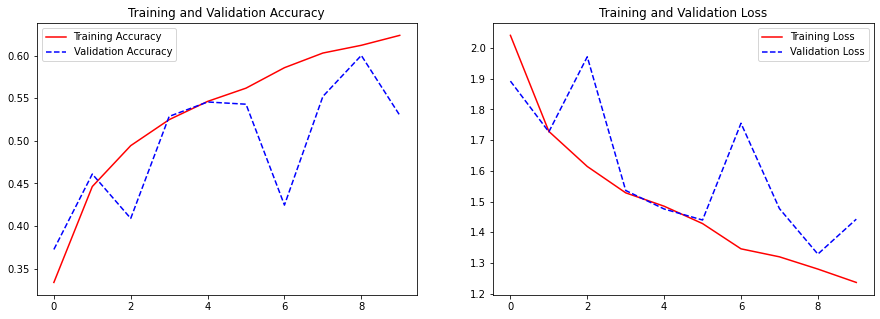

In [69]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history2)

It can be seen that, the validation accuracy and loss have shown more and high fluctuations over the 10 epochs.
The results are very inconsistent and don't follow any regular trend. At times, the validation accuracy is so low as compared to the training accuracy which is **a result of overfitting of the model**.

1/1 [==============================] - 0s 142ms/step


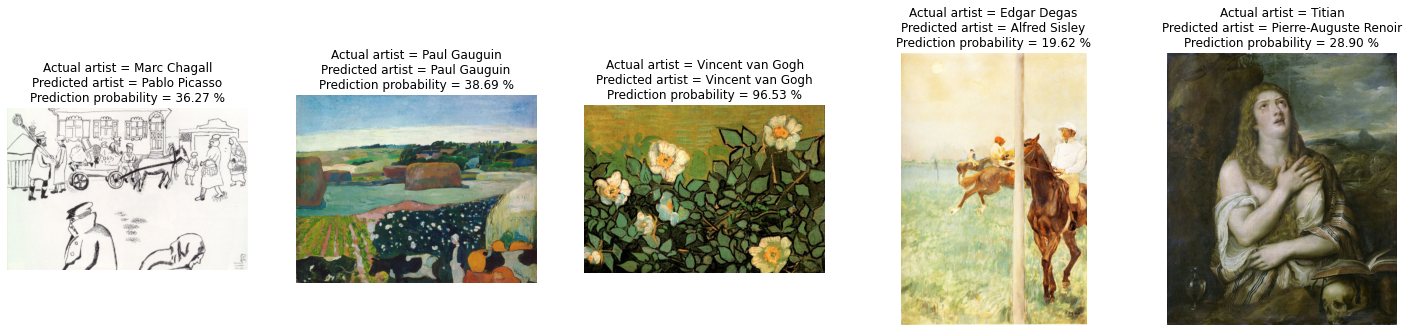

In [72]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model2.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of the above 5 random paintings, **the model was able to predict correct artist for only 2 of them**.

Out of those 2 correct predictions, the model predicted one artists with probability over 0.96  and one with lowest of 0.39. Because this model predicted only two artists right, it seems like the model hasn't really performed well.

**Observation** - 
______

Second CNN model - **model1**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.2501 | 0.6080 |
| Validation | 1.4174 | 0.5305 |
| Testing | 1.4607 | 0.5104 |

The training accuracy is quite higher than both validation and testing accuracies. The model is **overfitting**.
_____
**The testing accuracy of this second model came out as approximately 51%**, and the model didn't return good predictions on random images.
_____

<div align="center"> ResNet50 </div>

ResNet-50 is **a convolutional neural network that is 50 layers deep**. ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks, including object detection, image classification, etc.

**My data has just 11 classes with around 4000 images.** Overfitting can be expected in this model. I will use ResNet50 as the base model, will not train its already trained layers and will add some dense layers in the end.

In [119]:
# creating a ResNet50 base model for the sixth CNN model

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = train_input_shape)

In [131]:
# we don't need to train the already trained 50 layers of this resnet50 model

for layer in base_model.layers:
    layer.trainable = False

In [132]:
# getting the summary of this base model

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

<div align="center"> ResNet50 (Model 6) </div>

**Architecture of model2 is as follows -**


1. **ResNet50 base model**
2. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
3. **Dense** layer - with 200 neurons and 'relu' activation.
4. **BatchNormalization()** layer - a regularization technique to speed up training, use higher learning rates, and making learning easier.
5. **Dropout()** layer with 0.25 as the dropout rate - to prevent overfitting in our model by randomly dropping neurons during training. 
6. **Dense** layer - with 100 neurons and 'relu' activation.
7. **BatchNormalization()** layer - a regularization technique to speed up training, use higher learning rates, and making learning easier.
8. **Dropout()** layer with 0.25 as the dropout rate - to prevent overfitting in our model by randomly dropping neurons during training. 
7. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

In [133]:
# creating the sixth CNN model

model5 = tf.keras.Sequential([base_model, \
                            tf.keras.layers.Flatten(), \
                            tf.keras.layers.Dense(200, activation = 'relu'), \
                            tf.keras.layers.BatchNormalization(), \
                            tf.keras.layers.Dropout(0.25), \
                            tf.keras.layers.Dense(100, activation='relu'), \
                            tf.keras.layers.BatchNormalization(), \
                            tf.keras.layers.Dropout(0.25), \
                            tf.keras.layers.Dense(11, activation = 'softmax')])

In [134]:
# getting the summary of this model

model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_15 (Flatten)        (None, 100352)            0         
                                                                 
 dense_41 (Dense)            (None, 200)               20070600  
                                                                 
 batch_normalization_18 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               20100     
                                                     

Out of 43,680,723 parameters, there are **20,092,411 trainable parameters** and **23,588,312 non-trainable parameters**.

In [135]:
# using Adam optimizer using learning rate = 0.001

optimizer_adam = tf.keras.optimizers.Adam(0.001)

In [136]:
# compiling this model using 'accuracy' as the evaluation metric

model5.compile(loss = 'categorical_crossentropy', optimizer = optimizer_adam, metrics = ['accuracy'])

In [137]:
# fitting the model on our data with 10 epochs

history5 = model5.fit(train_generator, \
           steps_per_epoch = step_size_train, \
           epochs = 10, \
           validation_data = valid_generator, \
           validation_steps =  step_size_valid)

Epoch 1/10
193/193 [==============================] - 638s 3s/step - loss: 2.8211 - accuracy: 0.2064 - val_loss: 2.4800 - val_accuracy: 0.2969
Epoch 2/10
193/193 [==============================] - 793s 4s/step - loss: 2.3286 - accuracy: 0.2746 - val_loss: 1.9167 - val_accuracy: 0.3633
Epoch 3/10
193/193 [==============================] - 1650s 9s/step - loss: 2.1402 - accuracy: 0.2989 - val_loss: 1.9497 - val_accuracy: 0.3451
Epoch 4/10
193/193 [==============================] - 287s 1s/step - loss: 2.0464 - accuracy: 0.3171 - val_loss: 2.1130 - val_accuracy: 0.3177
Epoch 5/10
193/193 [==============================] - 307s 2s/step - loss: 1.9348 - accuracy: 0.3389 - val_loss: 1.7157 - val_accuracy: 0.4010
Epoch 6/10
193/193 [==============================] - 261s 1s/step - loss: 1.8992 - accuracy: 0.3466 - val_loss: 1.6821 - val_accuracy: 0.4206
Epoch 7/10
193/193 [==============================] - 261s 1s/step - loss: 1.8385 - accuracy: 0.3642 - val_loss: 1.6319 - val_accuracy: 0.457

In [138]:
# evaluating the model on data

results_train5 = model5.evaluate(train_generator)

results_valid5 = model5.evaluate(valid_generator)

results_test5 = model5.evaluate(test_generator)

27/27 [==============================] - 26s 950ms/step - loss: 1.8084 - accuracy: 0.3759


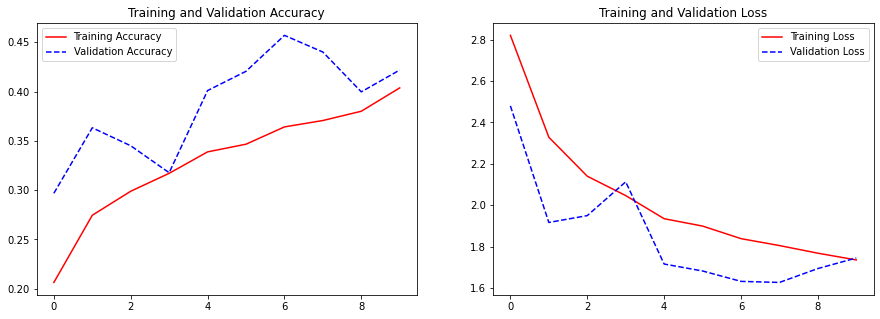

In [139]:
# plot the training graph

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    
    axes[0].plot(epochs, acc, 'r-', label = 'Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label = 'Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc = 'best')

    axes[1].plot(epochs, loss, 'r-', label = 'Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label = 'Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc = 'best')
    
    plt.show()
    
plot_training(history5)

It can be seen that, the validation accuracy and loss have shown more and high fluctuations over the 10 epochs and are both comparitely higher and lower respectively than the training accuracy and loss. 
The results are very inconsistent and don't follow any regular trend. At times, the validation accuracy is so high as compared to the training accuracy which is **a result of underfitting of the model**.

1/1 [==============================] - 0s 102ms/step


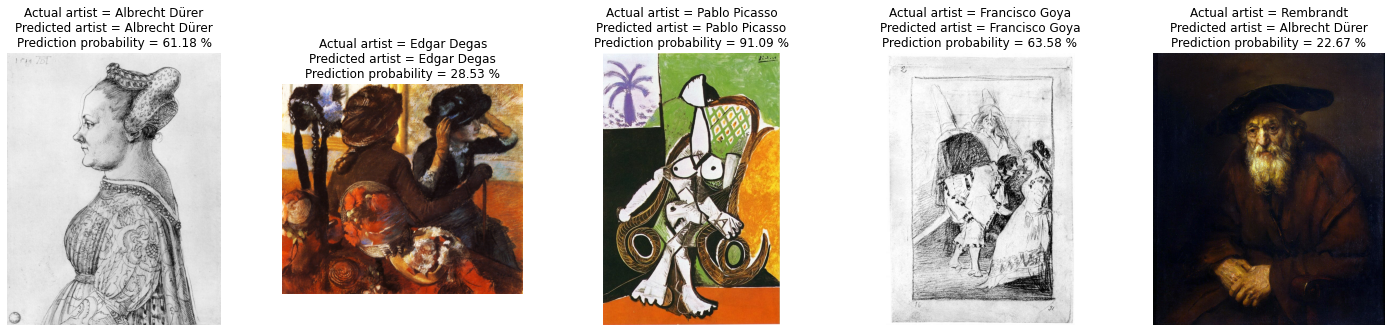

In [140]:
# making predictions and printing a few random outputs

n = 5
fig, axes = plt.subplots(1, n, figsize = (25, 5))

for i in range(n):
    random_artist = random.choice(top_artists_name)
    random_image = random.choice(os.listdir(os.path.join(test_images_dir, random_artist)))
    random_image_file = os.path.join(test_images_dir, random_artist, random_image)

    # original image
    test_image = load_img(random_image_file, target_size = (train_input_shape[0:2]))

    # predicting artist
    test_image = img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis = 0)

    prediction = model5.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = test_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # printing image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

It can be observed that, for out of the above 5 random paintings, **the model was able to predict correct artist for 4 of them**.

Out of those 4 correct predictions, the model predicted one artists with probability over 0.91  and one with lowest of 0.28. The predictions are good but the probabilities with which it randomly predicted a few artists are not comparitively better than some previous models.

**Observation** - 
______

Second CNN model - **model1**

- **Loss & Accuracy** -
| Data| Loss | Accuracy |
| ---- |--------------- | ---- |
| Training | 1.7076 | 0.4085 |
| Validation | 1.7486 | 0.4086 |
| Testing | 1.8084 | 0.3759 |

Though the three values for accuracy above are not as big as last models, after training the model for 10 epochs, the three accuracies are very close to each other, which is a sign that it is neither underfitting not overfitting.

_____
**The testing accuracy of this second model came out as approximately 38%**, which is the lowest of all the last models. It gave good predictions of random data. There's scope of improvement for this model and can be restructured to give better results.
_____

#### Conclusion & Comparison -


- **Accuracies of different models** -

| Data| VGG16 | ResNet50 |
| ---- |--------------- | --- |
| Training | 0.6080 | 0.4085 |
| Validation | 0.5305 | 0.4086 | 
| Testing | 0.5104| 0.3759 | 

Out of the above two pre-trained models, i.e., VGG16 and ResNet50, VGG16 seems to have overfitted on the data. The accuracies are comparitively higher than those of ResNet50, but don't seem to have given relatively high testing accuracy given the high training accuracy of the model.

I would choose **ResNet50** over **VGG16** for these trainings, even though both the models have high potential to give better accuracies by fine tuning of the hyperparameters.


**The accuracy can be further increased by playing around with different parameters such as -** 

* Training a few layers of these pretrained models that are not specific to the use case they were build for.
* Increasing the number of epochs.
* Playing around with parameters of fully connected layers.

______
______
## Discussion

### Comparison of all the CNN models used here



- **Accuracies of different models** -

| Data| model | model1 | model3 | model4 | VGG16(model2) | ResNet50(model5) |
| ---- |--------------- | ---- | ---- | ----- |--------------- | --- |
| Training | 0.5557 | 0.5593 | 0.6187 | 0.4559 | 0.6080 | 0.4085 |
| Validation | 0.5162 | 0.5084 | 0.5564 | 0.4527 | 0.5305 | 0.4086 | 
| Testing | 0.4640 | 0.5313 | 0.5360 | 0.4872 |  0.5104| 0.3759 | 


Out of the above 6 CNN models, the **best three models are model1 and model3 and model5**.
Model 3 seems to have overfitted but can be improved by making changes in the hyperparameters.

#### I cannot pick one best model yet, as they all require further finetuning of their parameters and more training to achieve better results.

## Conclusion

* **Model Selection** - After training 6 different CNN models on my image data, based on their training, validation, and testing accuracies & loss and the predictions made on the random test data, **model1** with the CNN architecture given below, gave the most good results. 

    1. **Conv2D** layer - with 16 kernels of shape (3,3) and 'relu' activation function. 
        The input shape of the training image data has been kept (224, 224, 3).
    2. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
    3. **Conv2D** with 32 kernels of shape (3,3) and 'relu' activation function. 
    4. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
    5. **Conv2D** with 128 kernels of shape (3,3) and 'relu' activation function. 
    6. **MaxPooling2d()** layer - to reduce the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.
    7. **Flatten()** layer - to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector to input into the fully connected dense layers.
    8. **Dense** layer - with 64 neurons and 'relu' activation.
    9. **Dense** layer with 32 neurons and 'relu' activation.
    10. **Dense** layer with 11 (number of classes) neurons and 'softmax' activation to return the predicted classes.

    There definitely is a need for more training, tweaking in the values of different parameters and modifying the architectures to get even better results.
    Most accuracies revolve around 50% which is not yet the best one. Therefore, there is a lot of scope for improvement in these models.


* **Key Findings** - 

    - Out of all 50 artists in the original datasets, 11 artists had more than 200 paintings and hence, only those artists and paintings are used throughout the model.
    - I couldn't find the best code to split data into train, test and valid data. So, I split the data by manually creating te folders. After that, the train data has 3097 images, the validation data has 771 images and the testing data has 431 images from 11 artists.
    - Different CNN models have been used and the accuracy of all the models is around 50%.
    - Adding BatchNormlaization and Dropout layers helped inprove model's performances.
    - Out of the 5 random paintings, 5 out of 6 models were able to predict atleast 6 correct artists. 
    - VGG16 seem to have overfitted and ResNet50 seem to have underfitted.
    
_______

Because I was able to get good prediction results even with around 50% accuracy, I think CNNs would be great for the use case and can help perform the required task with high efficiency.

_____
Note!
**_When I was training these models in VM, I was getting one error for Image Transformation that said, 'Image transformations require Scipy. Install Scipy'._** _The requirement was already satsfied. But, I again tried to reinstall Scipy. The error didn't get resolved and even I couldn't also find any helpful solution online. If I could train my models on the VM, the training would have been faster giving me more time for improving. Therefore, I believe,a lot can be improved in this model._